In [17]:
import numpy as np

def resize_axis(array, N):
    if(array.shape[1] > N):
        resized = array[:,:N]
    else:
        resized = np.lib.pad(array, ((0,0),(0,N - array.shape[1])),\
            'constant', constant_values=(np.min(array)))
    return resized
        

In [18]:
CNN_INPUT_SIZE = (128, 20)
DEFAULT_SR = 22050

def extract_cnn_input(raw_audio):
    frame_length = min(2048, len(raw_audio))
    mel_spec = librosa.core.power_to_db(librosa.feature.melspectrogram(
        y=raw_audio, sr=DEFAULT_SR, n_fft=frame_length,
        hop_length=frame_length//4, n_mels=CNN_INPUT_SIZE[0])
    )
    # Truncate number of frames stored
    m = min(CNN_INPUT_SIZE[1], mel_spec.shape[1])
    print(mel_spec.shape[1])
    N =20
    mell = resize_axis(mel_spec[:, 0:m], N)
    return mell

In [19]:
CNN_INPUT_SIZE = (128, 20)

In [20]:
DEFAULT_SR = 22050

67


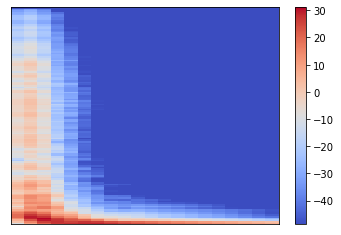

In [97]:
import librosa
import librosa.display

import numpy as np
import matplotlib.pyplot as plt

# from past.utils import old_div

#y, sr = librosa.load("D:\Drum\HiHat\hat 2 SMOKE.wav")
#y, sr = librosa.load("D:\Drum\HiHat\!Hat 39.wav")
#y, sr = librosa.load('/Users/cooky/HDD/Drum/Dilla Drums/!Snare 170.wav')
y, sr = librosa.load('/Users/cooky/HDD/Drum/illmind blap kit 7/KICK_FUELO.wav')
#y, sr = librosa.load('/Users/cooky/HDD/Drum/Dilla Drums/!Snare 170.wav')

#print(y.shape)

yt, index = librosa.effects.trim(y=y, top_db=30)



yt = librosa.util.normalize(yt)

#print(yt)

#D = librosa.stft(yt)  # STFT of y

# print(D.shape)

# mel = librosa.feature.melspectrogram(
#         S=D, sr=DEFAULT_SR,
#         hop_length=1024, n_mels=128)


#S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

#resized_S_db = resize_axis(S_db)

#print(S_db.shape)

k = extract_cnn_input(y)

plt.figure()
librosa.display.specshow(k)
plt.colorbar()


# plt.figure()
# librosa.display.specshow(mel)
# plt.colorbar()

----

C Q T

In [98]:
C = np.abs(librosa.cqt(yt, sr=sr))

/Users/cooky/miniforge3/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=256 is too small for input signal of length=176
  return f(*args, **kwargs)


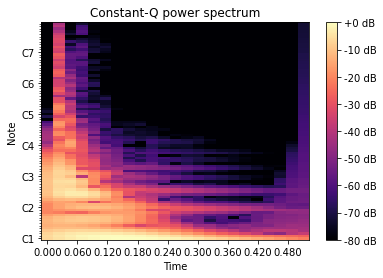

In [99]:
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max), sr=sr, x_axis='time', y_axis='cqt_note', ax=ax)
ax.set_title('Constant-Q power spectrum')
fig.colorbar(img, ax=ax, format="%+2.0f dB")
k = librosa.amplitude_to_db(C, ref=np.max)

In [100]:
k.shape

(84, 23)

zcr

In [101]:
z = librosa.feature.zero_crossing_rate(yt)

In [102]:
z

array([[0.08056641, 0.08154297, 0.08251953, 0.00585938, 0.00341797,
        0.00341797, 0.00292969, 0.00292969, 0.00292969, 0.00292969,
        0.00292969, 0.00292969, 0.00292969, 0.00292969, 0.00292969,
        0.00292969, 0.00292969, 0.00292969, 0.00292969, 0.00292969,
        0.00292969, 0.00195312, 0.00146484]])

spectral bandwidth

In [103]:
spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
S, phase = librosa.magphase(librosa.stft(y=y))

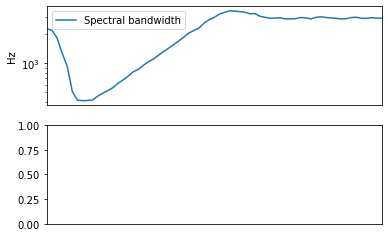

In [109]:
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(spec_bw)
centroid = librosa.feature.spectral_centroid(S=S)
ax[0].semilogy(times, spec_bw[0], label='Spectral bandwidth')
ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
ax[0].legend()
ax[0].label_outer()
#librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', ax=ax[1])
#ax[1].set(title='log Power spectrogram')

# ax[1].fill_between(times, np.maximum(0, centroid[0] - spec_bw[0]), np.minimum(centroid[0] + spec_bw[0], sr/2), alpha=0.5, label='Centroid +- bandwidth')
# ax[1].plot(times, centroid[0], label='Spectral centroid', color='w')
# ax[1].legend(loc='lower right')